In [1]:
from activ import load_data, data_normalization
import os
from activ.readfile import TrackTBIFile
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap, nmf_bases_heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
raw = load_data()
labels = raw.outcome_features
nmfdata = load_data(uoinmf=True)
rawbm = raw.biomarkers #(247,235)

feature_names = raw.outcome_features
A = data_normalization.data_normalization(raw.outcomes, 'positive') #(247,177)
w = nmfdata.outcomes #(247,6)
h = nmfdata.outcome_bases #(6,177)

w = w.sum(axis=1)
w.shape

(247,)

In [74]:
percent = [0,10,20,30,40,50,60,70,80,90]
for p in [percent[0]]:
    file = "/Users/ahyeon/Desktop/activ/results/features_dropped/bm_features_dropped/euclidean/bm_features_dropped_result_{}.h5".format(p)
    f = h5py.File(file, 'r')
    clusters = f['clusters'][:]
    cluster_sizes = f['cluster_sizes'][:]
    clusters_28 = clusters[:,27,:]
    print(clusters_28.shape)
    sorted_labels = sorted(clusters_28[0])

(50, 247)


In [75]:
all_avg = np.zeros((28,50))
for j in range(50):
    for k in range(28):
        indices = []
        for i in range(clusters_28.shape[1]):
            if clusters_28[j][i] == k:
                indices.append(i)
        values = []
        for x in indices:
            val = w[x]
            values.append(val)
        avg = sum(values)/len(values)
        all_avg[k,j] = avg
all_avg.shape

(28, 50)

<Figure size 432x288 with 0 Axes>

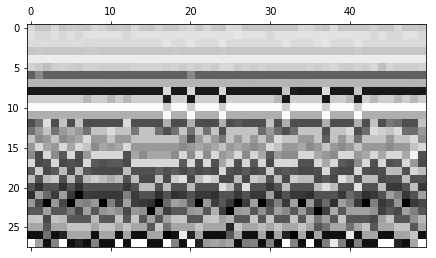

In [76]:
plt.figure()
plt.matshow(all_avg, cmap = 'gray_r')

<Figure size 432x288 with 0 Axes>

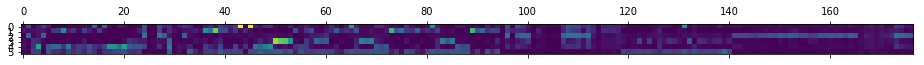

In [8]:
plt.figure()
plt.matshow(h)